# Gerekli Kütüphanelerin Eklenmesi


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

# Veri ön inceleme

In [2]:
insurance = pd.read_csv(r"C:\Users\ibrah\OneDrive\Masaüstü\Pythonnnnnnn\Global AI Hub Projects\Data Science Project\Data\insurance.csv")

In [3]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
insurance.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [5]:
print(insurance.sex.unique())
print(insurance.smoker.unique())
print(insurance.region.unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [6]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Keşifsel Veri Analizi Yapılması


###### Bmi(Vücut Kitle İndeksi)’nin dağılımı

Bütün veri setindeki kişilerin vucut kitle edeksleri ortalaması 30, bu durum veri setimizde bulunan insanların ortalamadan fazlasının obezite sınırını geçtiklerini gösteriyor. Standart sapma 6, ki bu ortalamaya baktığımızda büyük bir rakam. Bunun anlamı kimileri ortalamında 6 birim üstünde vucut kitle endeksine sahipken kimileri ise ortalamın 6 birim altında vucut kitle endeksine sahip. Minimum değer vucut kitle endeksi 15 iken maksimum 53 ve verinin yüzde 25'i 50'si ve 75'i ile yaptığımızda ortalama hesaplamalarıda sırasıyla 26, 30, 34 olarak çıkmıştır.

In [7]:
insurance.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

######  “Smoker” ile “charges” arasındaki ilişki

Scatter plot ile chart oluşturduğumuzda açıkça görmekteyiz ki, sigara içenlerin charging'i içmeyenlere göre % 50 fazla. Bunu daha iyi görebilmek için veri setini ikiye ayırdık birisi içenler diğeri ise içmeyenler olacak şekilde. İçenlere baktığımızda ortalama charging 32050 buna karşın içmeyenlerde 8434 bu bize gösteriyor ki aradaki fark 4 kattır. İçmeyenler içenlere göre ortalama 4 kat daha ucuz sigorta pirimleri ödüyor.

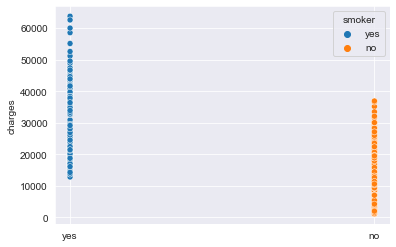

In [8]:
sns.set_style("darkgrid")

ax = sns.scatterplot(x= "smoker",
           y= "charges",
           hue= "smoker",     
           data= insurance)
ax.set(xlabel=None)
plt.show()

In [9]:
smoker_yes = insurance[insurance["smoker"] == "yes"]
smoker_no = insurance[insurance["smoker"] == "no"]
print(smoker_yes["charges"].describe())
print(smoker_no["charges"].describe())

count      274.000000
mean     32050.231832
std      11541.547176
min      12829.455100
25%      20826.244213
50%      34456.348450
75%      41019.207275
max      63770.428010
Name: charges, dtype: float64
count     1064.000000
mean      8434.268298
std       5993.781819
min       1121.873900
25%       3986.438700
50%       7345.405300
75%      11362.887050
max      36910.608030
Name: charges, dtype: float64


######  “Smoker” (Sigara tüketen) ile “region”(Bölge) arasındaki ilişki

Burada da yukarda içenler içmeyenler diye hazırladığım data gruplarını kullanıp, catplot chart'ı ile en fazla hangi bölgede en az hangi bögelerde sigara içildiğini görselleştirdik. Buna göre en çok sigara southeast buna karşın en az sigara ise southwest ve northwest bölgelerinde içiliyor.

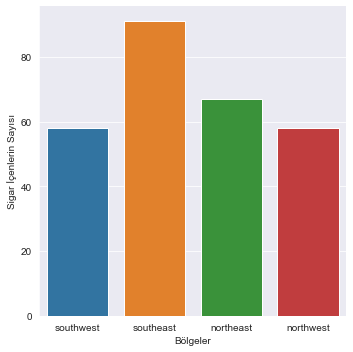

In [10]:
plot = sns.catplot(x= "region",
           data= smoker_yes,
           kind= "count")
plot.set(xlabel= "Bölgeler",
    ylabel= "Sigar İçenlerin Sayısı")

plt.show()

###### “Bmi” ile “sex” (Cinsiyet) arasındaki ilişki

Aralarında çok güçlü bir bağ yok. Çünkü grafiğe ve dağılımlara baktığında çok fazla bir değişim görmüyorsun. Ortalamalar neredeyse aynı, min ve max değerlerinde çok ufak değişmeler var sadece.


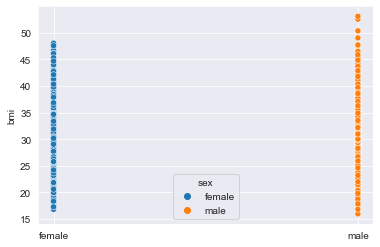

In [11]:
sns.set_style("darkgrid")

ax = sns.scatterplot(x= "sex",
           y= "bmi",
           hue= "sex",     
           data= insurance)
ax.set(xlabel=None)
plt.show()

In [12]:
female_bmi = insurance[insurance["sex"] == "female"].bmi.describe()
male_bmi = insurance[insurance["sex"] == "male"].bmi.describe()

print(female_bmi)
print(male_bmi)

count    662.000000
mean      30.377749
std        6.046023
min       16.815000
25%       26.125000
50%       30.107500
75%       34.313750
max       48.070000
Name: bmi, dtype: float64
count    676.000000
mean      30.943129
std        6.140435
min       15.960000
25%       26.410000
50%       30.687500
75%       34.992500
max       53.130000
Name: bmi, dtype: float64


###### En çok “children”’a sahip “region”’

Southeast bölgesi 382 ile en fazla çocuğa sahip, onu 373 ve 371 ile sırasıyla northwest ve southwest tahip ediyor.

In [13]:
insurance.groupby(["region"])[[ "children"]].agg([np.sum])

,children
,sum
region,
northeast,339
northwest,373
southeast,382
southwest,371


######  “Age” ile “bmi” arasındaki ilişki

Aralarındaki ilişkiye bakabilmek için en sağlıklı grafiğin line grap olduğunu düşündüğüm için line graph çizdim. Chart'ı incelediğimde açıkça görüyorum ki doğrusal bir ilişki yok. Yaşlara ve dönemlere göre bmi değişiklik gösterebiliyor ama bu değişimler çok küçük rakamlar olduğu için age ve bmi arasındaki ilişkiye negatif diyorum.

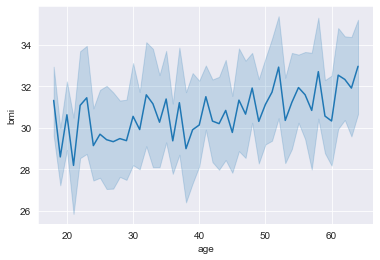

In [14]:
sns.lineplot(x= "age",
             y= "bmi",
            data= insurance)
plt.show()

###### “Bmi” ile “children” arasındaki ilişki

Bmi ve childeren arasındaki ilişki de 3 çocuğa kadar pasif kalmış, daha sonrasında 4. çocukta yarım puan artmış ve 5. çocukta 1 puan düşmüş. Güçlü bir ilişki diyemeyiz. Yarım ve 1 puanlık değişimlerin sebebi çocuk olması için güçlü emareler yok.

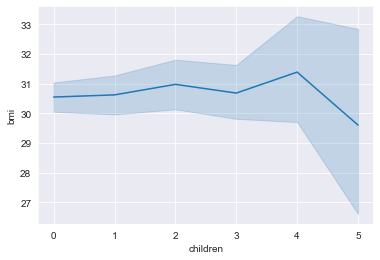

In [15]:
sns.lineplot(x= "children",
             y= "bmi",
            data= insurance)
plt.show()

###### “Bmi” değişkeninde outlier var mıdır?

Outlier'ın var olup olmadığına bakabilmek için birden fazla yöntem var bunun için en çok kullanılan yöntemlerden birisi veriyi visualise etmek. İlk başta bmi verisinin tamamını görebilmek için female ve male olarak visualise ettim. Sonrasında daha dikkatli bakmak için min ve max taraflarına zoom yaptım.

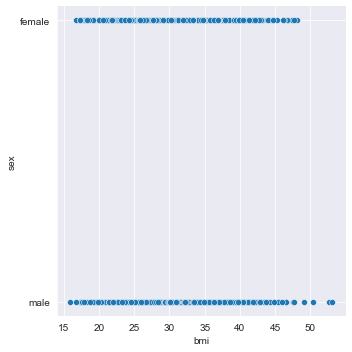

In [16]:
sns.relplot(x = "bmi",
              y= "sex",
            data = insurance)


Bu zoom'u yapabilmek için veriyi iki gruba ayırdım. Bmi'nin 40'dan büyük ve 10'da küçük olduğu ihtimallerde veriyi iki ayrı şekilde visualise ettim. Daha sonrasında onları visualise ettiğimde zoom etmiş oldum ama açıkça görülüyor ki outlier yok.

In [17]:
bmi_out = insurance[insurance["bmi"] >= 40]
bmi_out_2 = insurance[insurance["bmi"] <= 10]

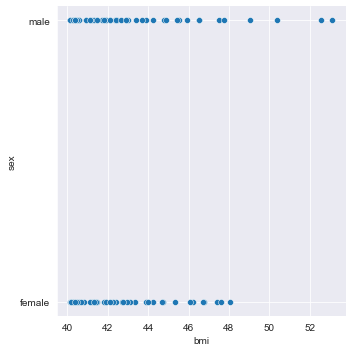

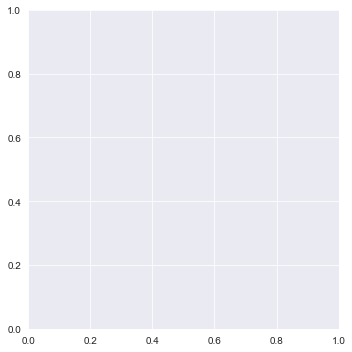

In [18]:
sns.relplot(x = "bmi",
              y= "sex",
            data = bmi_out)
sns.relplot(x = "bmi",
              y= "sex",
            data = bmi_out_2)
plt.show()

###### “Bmi” ile “charges” arasındaki ilişki

Bmi ile charges arasındaki değişimi görmek için scatter plot kullandım. Veriyi scatter plot ile visualise ettiğimde 1000 ve altında çok fazla yığılma olduğu için veriyi charge değeri 1000 ve üstü olacak şekilde filter ettim.


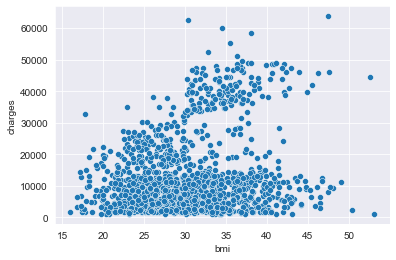

In [19]:
sns.scatterplot(x= "bmi",
             y= "charges",
            data= insurance)
plt.show()

Filter edip tekrardan visualise ettiğimde bmi oratalamın yani 30'un üstüne çıktığında charges'de gözle görülür bir değişim oluyor. Bunu daha iyi anlamak için veriyi iki grubu ayırdım. İlki bmi 30 ve altı diğeri ise üstü. Bu iki grubun charges ortalamalarındaki değişimden anlaşılıyorki bmi ile charges arasında güçlü bir bağ var. Bmi değeri 30 üstü olanların ortalaması ile 30 altı olanların ortalaması arasında %50 değer değişimi var.

In [20]:
insurance_charge = insurance[insurance["charges"] > 10000]

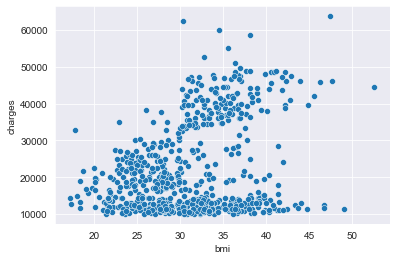

In [21]:
sns.scatterplot(x= "bmi",
             y= "charges",
            data= insurance_charge)
plt.show()

In [22]:
bmi_more = insurance[insurance["bmi"] > 30 ].charges.describe()
bmi_less = insurance[insurance["bmi"] <= 30].charges.describe()
print(bmi_more)
print(bmi_less)

count      705.000000
mean     15560.926321
std      14563.057442
min       1131.506600
25%       5240.765000
50%       9964.060000
75%      19673.335730
max      63770.428010
Name: charges, dtype: float64
count      633.000000
mean     10719.386942
std       7850.451272
min       1121.873900
25%       4435.094200
50%       8604.483650
75%      14988.432000
max      38245.593270
Name: charges, dtype: float64


###### “Region”, “smoker” ve “bmi” arasındaki ilişki

Region, smoker, ve bmi arasında ilişkiyi bar grap ile göstermemi istemişsiniz ama scatter plot ile daha sağlıklı olduğu düşündüğüm için scatter plot ile göstermek istedim.

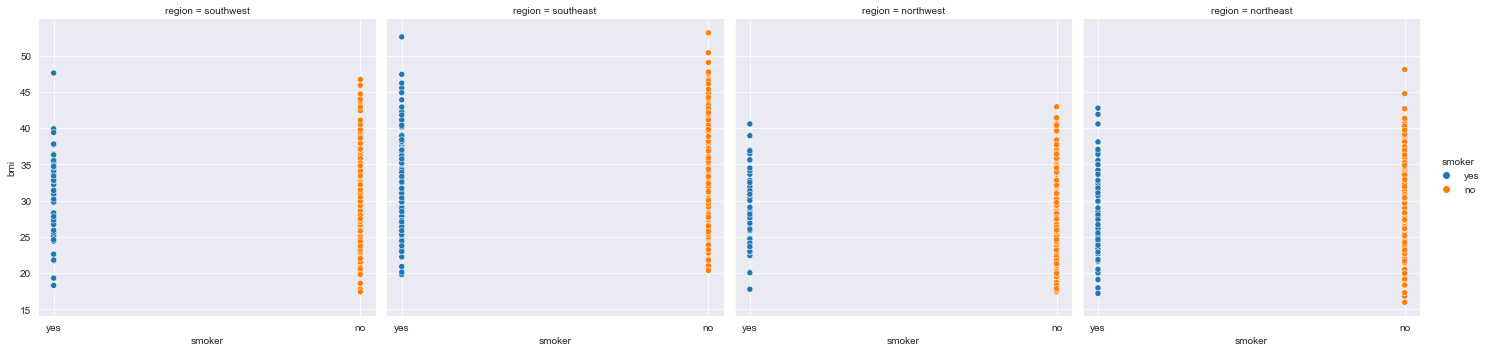

In [23]:
sns.relplot(x="smoker",                   
               y= "bmi",
               data= insurance,
            kind= "scatter",               
                col= "region",
            hue = "smoker",
            
               )
plt.show()


# Veri Ön İşleme Yapılması

In [24]:
insurance.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


###### Kategorik değişkenleri düzenlemek için Label ve One-Hot Encoding tekniklerini kullanınız.

* Kategorik değişkenleri düzenlemek için önce LabelEncoder yöntemini kullanarak sex ve smoker'ı binary değerlere dönüştürdüm. 
* Daha sonra pandas dummies'i kullanarak kategorik olan region verilerini binary değerlere dönüştürdüm.


In [25]:
labelencoder = LabelEncoder()
insurance["sex"] = labelencoder.fit_transform(insurance["sex"].values) 

In [26]:
insurance["smoker"] = labelencoder.fit_transform(insurance["smoker"].values) 

In [27]:
insurance = pd.get_dummies(insurance)
insurance.head(3)

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.90,0,1,16884.9240,0,0,0,1
1,18,1,33.77,1,0,1725.5523,0,0,1,0
2,28,1,33.00,3,0,4449.4620,0,0,1,0


###### Veri setinizi X_train,X_test, y_train, y_test olacak şekilde bölüştürünüz ve veri setini normalize ederek ölçekleyiniz.

In [28]:
X = insurance.drop("charges", axis = 1)
y = insurance["charges"]





###### Veri setini normalize ederek ölçekleyiniz.


In [29]:
X = preprocessing.normalize(X)


In [30]:
SEED = 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                   random_state = SEED)

# Model Seçme

Bunun için 3 tip regression modellerini ayrı ayrı train edeceğim. Bunlar sırasıyla;

* Linear Regression
* Lasso Regression
* Ridge Regression


In [31]:
lin_reg = LinearRegression()
las_reg = Lasso()
rid_reg = Ridge()

In [32]:
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)


In [33]:
print(lin_reg.score(X_train, y_train))
print(lin_reg.score(X_test, y_test))

0.654796203488902
0.6480781324074156


In [34]:
las_reg.fit(X_train, y_train)
y_pred_las = las_reg.predict(X_test)


In [35]:
print(las_reg.score(X_train, y_train))
print(las_reg.score(X_test, y_test))

0.6478229458201933
0.631336428193138


In [36]:
rid_reg.fit(X_train, y_train)
y_pred_rid = rid_reg.predict(X_test)


In [37]:
print(rid_reg.score(X_train, y_train))
print(rid_reg.score(X_test, y_test))

0.10158098867739263
0.09482936076836335


Linear regression ve lasso regression score'ları birbirine çok yakın olduğu için bu iki model ile devam edeceğim.

# Hiper-parametre Optimizasyonu

Bunun için grid search cv yerine random search cv kullandım çünkü parametreleri geniş tutup daha fazla ihtimal arasında optimizasyon yapmak istedim. Fakat hiper-parameter optimizasyonunu sadece Lasso regression'da yaptım. Linear regression'da kullanabileceğim parametreler yok. Fakat bu training'in en iyi modeli yine linear regression ile sağlanıyor. Score en iyi parametre ihtimallerinde bir Lasso regression'da %64'e ulaşmadı.

In [38]:
kf = KFold(n_splits = 10, shuffle = True, random_state = SEED)
param_grid = {"alpha": np.arange(0.01, 10, 100),
              "max_iter": np.arange(1, 10000, 100),
             "selection": ["cyclic", "random"]}

lasso = Lasso()

lasso_cv = RandomizedSearchCV(lasso, param_grid, cv= kf)
lasso_cv.fit(X_train, y_train)
print(lasso_cv.best_params_, lasso_cv.best_score_)

              



{'selection': 'cyclic', 'max_iter': 2101, 'alpha': 0.01} 0.640389916865507


# Modeli Değerlendirme

Model değerlendirme bölümünü üçe böldüm;
* ilkinde yukarıdaki training sonrası çıkan modelleri değerlendirdim çünkü yukarıdaki training'de standard scaller yada polynomial kullanmak yerine noramlizer ile ölçeklendirmiştim. Onun değerleri aşağıda.
* ikincisinde ise standard scaler ile veriyi ölçeklendirip tekrardan training aşamalarına soktum, veriyi tekrar train ederken parametre optimizasyonunda elde ettiğim alpha değerini kullandım.
* sonunda ise polynomial ile veriyi ölçeklendirip tekrardan training aşamalarına soktum, veriyi tekrar train ederken parametre optimizasyonunda elde ettiğim alpha değerini kullandım.


In [39]:
print("Predictions: {}, Actual Values: {}".format(y_pred_lin[:5], y_test[:5]))

Predictions: [ 5757.99206227 14154.47938788 13571.05599546 13400.26529706
 -2391.58514808], Actual Values: 559      1646.4297
1087    11353.2276
1020     8798.5930
460     10381.4787
802      2103.0800
Name: charges, dtype: float64


In [40]:
print("Predictions: {}, Actual Values: {}".format(y_pred_las[:5], y_test[:5]))

Predictions: [ 5338.72259135 13644.24363638 12574.88966206 12695.00214572
  -320.75177104], Actual Values: 559      1646.4297
1087    11353.2276
1020     8798.5930
460     10381.4787
802      2103.0800
Name: charges, dtype: float64


In [41]:
RMSE_linreg =mean_squared_error(y_test, y_pred_lin, squared= False)
RMSE_linreg

7062.095737278523

In [42]:
RMSE_las =mean_squared_error(y_test, y_pred_las, squared= False)
RMSE_las

7228.123879868179

* İşte buradan sonra standard scaler ile optimize edilmiş veri setiyle tekrar training yaptım.

In [43]:
insurance_1 = pd.read_csv(r"C:\Users\ibrah\OneDrive\Masaüstü\Pythonnnnnnn\Global AI Hub Projects\Data Science Project\Data\insurance.csv")

In [44]:
labelencoder = LabelEncoder()
insurance_1["sex"] = labelencoder.fit_transform(insurance_1["sex"].values) 

In [45]:
insurance_1["smoker"] = labelencoder.fit_transform(insurance_1["smoker"].values) 

In [46]:
insurance_1 = pd.get_dummies(insurance_1)
insurance_1.head(3)

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.90,0,1,16884.9240,0,0,0,1
1,18,1,33.77,1,0,1725.5523,0,0,1,0
2,28,1,33.00,3,0,4449.4620,0,0,1,0


In [47]:
X_1 = insurance_1.drop("charges", axis = 1)
y_1 = insurance_1["charges"]

In [48]:
SEED = 2

X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size = 0.3,
                                                   random_state = SEED)

In [49]:
scaler =StandardScaler()
X_1_train_scaled = scaler.fit_transform(X_1_train)
X_1_test_scaled = scaler.transform(X_1_test)

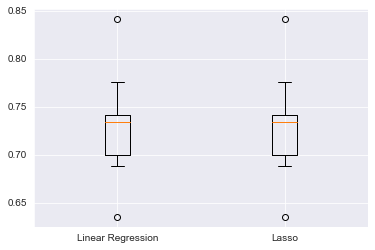

In [50]:
models = {"Linear Regression": LinearRegression(), "Lasso": Lasso(alpha=0.01)}
results = []


for model in models.values():
    kf = KFold(n_splits=10, random_state=SEED, shuffle=True)
  
  # Perform cross-validation
    cv_scores = cross_val_score(model, X_1_train, y_1_train, cv=kf)
  
  # Append the results
    results.append(cv_scores)

# Create a box plot of the results
plt.boxplot(results, labels=models.keys())
plt.show()

In [51]:
for name, model in models.items():
    model.fit(X_1_train, y_1_train)
    test_score = model.score(X_1_test, y_1_test)
    print("{} Test Set Accuracy: {}".format(name, test_score))

Linear Regression Test Set Accuracy: 0.7642348545269875
Lasso Test Set Accuracy: 0.7642348775002678


In [52]:
for name, model in models.items():
    model.fit(X_1_train_scaled, y_1_train)
    y_1_pred = model.predict(X_1_test_scaled)
    test_rmse = mean_squared_error(y_1_test, y_1_pred, squared= False)
    print("{} Test Set RMSE: {}".format(name, test_rmse))
    print("{} Predictions: {}, Actual Values: {}".format(name, y_1_pred[:5], y_test[:5]))

Linear Regression Test Set RMSE: 6173.227072593415
Linear Regression Predictions: [ 2081.40696945 12095.34272292 10543.98701922  2596.691265
  8389.43547912], Actual Values: 559      1646.4297
1087    11353.2276
1020     8798.5930
460     10381.4787
802      2103.0800
Name: charges, dtype: float64
Lasso Test Set RMSE: 6173.227036966229
Lasso Predictions: [ 2081.45126417 12095.33413749 10543.9996001   2596.71838527
  8389.44529213], Actual Values: 559      1646.4297
1087    11353.2276
1020     8798.5930
460     10381.4787
802      2103.0800
Name: charges, dtype: float64


* İkinci training işleminde açıkça görülüyor ki score'lar ve RMSE değerlerinde iyileşme var.
* Şimdi ise polynomial kullanarak optimize edilmiş train modelleri var

In [53]:
insurance_2 = pd.read_csv(r"C:\Users\ibrah\OneDrive\Masaüstü\Pythonnnnnnn\Global AI Hub Projects\Data Science Project\Data\insurance.csv")

In [54]:
labelencoder = LabelEncoder()
insurance_2["sex"] = labelencoder.fit_transform(insurance_2["sex"].values) 

In [55]:
insurance_2["smoker"] = labelencoder.fit_transform(insurance_2["smoker"].values) 

In [56]:
insurance_2 = pd.get_dummies(insurance_1)
insurance_2.head(3)

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.90,0,1,16884.9240,0,0,0,1
1,18,1,33.77,1,0,1725.5523,0,0,1,0
2,28,1,33.00,3,0,4449.4620,0,0,1,0


In [57]:
X_2 = insurance_2.drop("charges", axis = 1)
y_2 = insurance_2["charges"]

In [58]:
poly_reg = PolynomialFeatures(degree= 2)
X_poly = poly_reg.fit_transform(X_2)

In [59]:
SEED = 3

X_poly_train, X_poly_test, y_2_train, y_2_test = train_test_split(X_poly, y_2, test_size = 0.3,
                                                   random_state = SEED)

C:\Users\ibrah\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.503e+09, tolerance: 1.284e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\ibrah\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.384e+09, tolerance: 1.245e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\ibrah\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

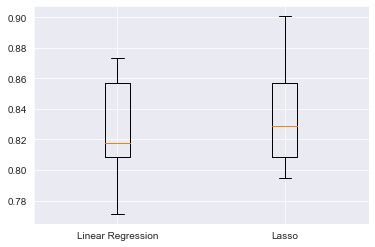

In [60]:
models = {"Linear Regression": LinearRegression(), "Lasso": Lasso(alpha=0.01)}
results = []


for model in models.values():
    kf = KFold(n_splits=10, random_state=SEED, shuffle=True)
  
  # Perform cross-validation
    cv_scores = cross_val_score(model, X_poly_train, y_2_train, cv=kf)
  
  # Append the results
    results.append(cv_scores)

# Create a box plot of the results
plt.boxplot(results, labels=models.keys())
plt.show()


In [61]:
for name, model in models.items():
    model.fit(X_poly_train, y_2_train)
    test_score = model.score(X_poly_test, y_2_test)
    print("{} Test Set Accuracy: {}".format(name, test_score))

Linear Regression Test Set Accuracy: 0.8312509925003926
Lasso Test Set Accuracy: 0.8312515995851405


C:\Users\ibrah\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.026e+10, tolerance: 1.394e+07
  model = cd_fast.enet_coordinate_descent(


In [62]:
for name, model in models.items():
    model.fit(X_poly_train, y_2_train)
    y_2_pred = model.predict(X_poly_test)
    test_rmse = mean_squared_error(y_2_test, y_2_pred, squared= False)
    print("{} Test Set RMSE: {}".format(name, test_rmse))
    print("{} Predictions: {}, Actual Values: {}".format(name, y_2_pred[:5], y_test[:5]))

Linear Regression Test Set RMSE: 4878.467344763226
Linear Regression Predictions: [ 6520.4552638  10414.50621999  3469.6320337  12348.53753618
  1442.86875623], Actual Values: 559      1646.4297
1087    11353.2276
1020     8798.5930
460     10381.4787
802      2103.0800
Name: charges, dtype: float64
Lasso Test Set RMSE: 4878.458569464854
Lasso Predictions: [ 6520.3145581  10414.47344181  3469.68397849 12348.67297522
  1442.44447573], Actual Values: 559      1646.4297
1087    11353.2276
1020     8798.5930
460     10381.4787
802      2103.0800
Name: charges, dtype: float64


C:\Users\ibrah\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.026e+10, tolerance: 1.394e+07
  model = cd_fast.enet_coordinate_descent(


* En iyi sonuçları polynomial ile optimize edildikten sonra uygulanan training modellerden aldım.

# Sonuç:

* Birden fazla regression, birden fazla optimizasyon ve parametre var. Biz en doğru yöntemi bulmak için hepsini teker teker denedik ve en iyi sonuçları linear ve lasso regression'un alpha 0.01 parametresinde polynomial regression ile optimize edilmiş durumda elde ettik. Accurancy değerleri her ikisinde de % 83'e ulaştı.